<a href="https://colab.research.google.com/github/othniel77/datascience/blob/main/La_pr%C3%A9diction_des_prix_de_cloture_de_Tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as smi
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN,GRU
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tensorflow.keras.optimizers import Adam
import warnings
warnings.simplefilter('ignore')


In [2]:
from google.colab import files
data_to_load = files.upload()

Saving TSLA.csv to TSLA.csv


In [3]:
df = pd.read_csv('/content/TSLA.csv')
df = df[df['Date'] >= '2015-01-01']
df.head(5)


,Date,Open,High,Low,Close,Adj Close,Volume
1136,2015-01-02,44.574001,44.650002,42.652000,43.862000,43.862000,23822000
1137,2015-01-05,42.910000,43.299999,41.431999,42.018002,42.018002,26842500
1138,2015-01-06,42.012001,42.840000,40.841999,42.256001,42.256001,31309500
1139,2015-01-07,42.669998,42.956001,41.956001,42.189999,42.189999,14842000
1140,2015-01-08,42.562000,42.759998,42.001999,42.124001,42.124001,17212500


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 1136 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1820 non-null   object 
 1   Open       1820 non-null   float64
 2   High       1820 non-null   float64
 3   Low        1820 non-null   float64
 4   Close      1820 non-null   float64
 5   Adj Close  1820 non-null   float64
 6   Volume     1820 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 113.8+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1.820000e+03
mean,214.246240,219.028330,209.178651,214.366553,214.366553,3.795056e+07
std,294.163722,301.050022,286.720929,294.239190,294.239190,2.781380e+07
min,28.464001,30.993999,28.209999,28.733999,28.733999,3.540000e+06
25%,47.013502,47.786499,46.197999,47.021500,47.021500,2.093955e+07
50%,62.567001,63.395001,61.295000,62.460001,62.460001,2.941975e+07
75%,182.681999,189.216995,177.118496,181.020996,181.020996,4.390575e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [6]:
df.mean()


Open         2.142462e+02
High         2.190283e+02
Low          2.091787e+02
Close        2.143666e+02
Adj Close    2.143666e+02
Volume       3.795056e+07
dtype: float64

In [7]:
df.median()


Open         6.256700e+01
High         6.339500e+01
Low          6.129500e+01
Close        6.246000e+01
Adj Close    6.246000e+01
Volume       2.941975e+07
dtype: float64

In [8]:
df.skew()

Open         1.653125
High         1.654695
Low          1.649015
Close        1.650743
Adj Close    1.650743
Volume       2.665148
dtype: float64

In [9]:
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
df.shape

(1820, 7)

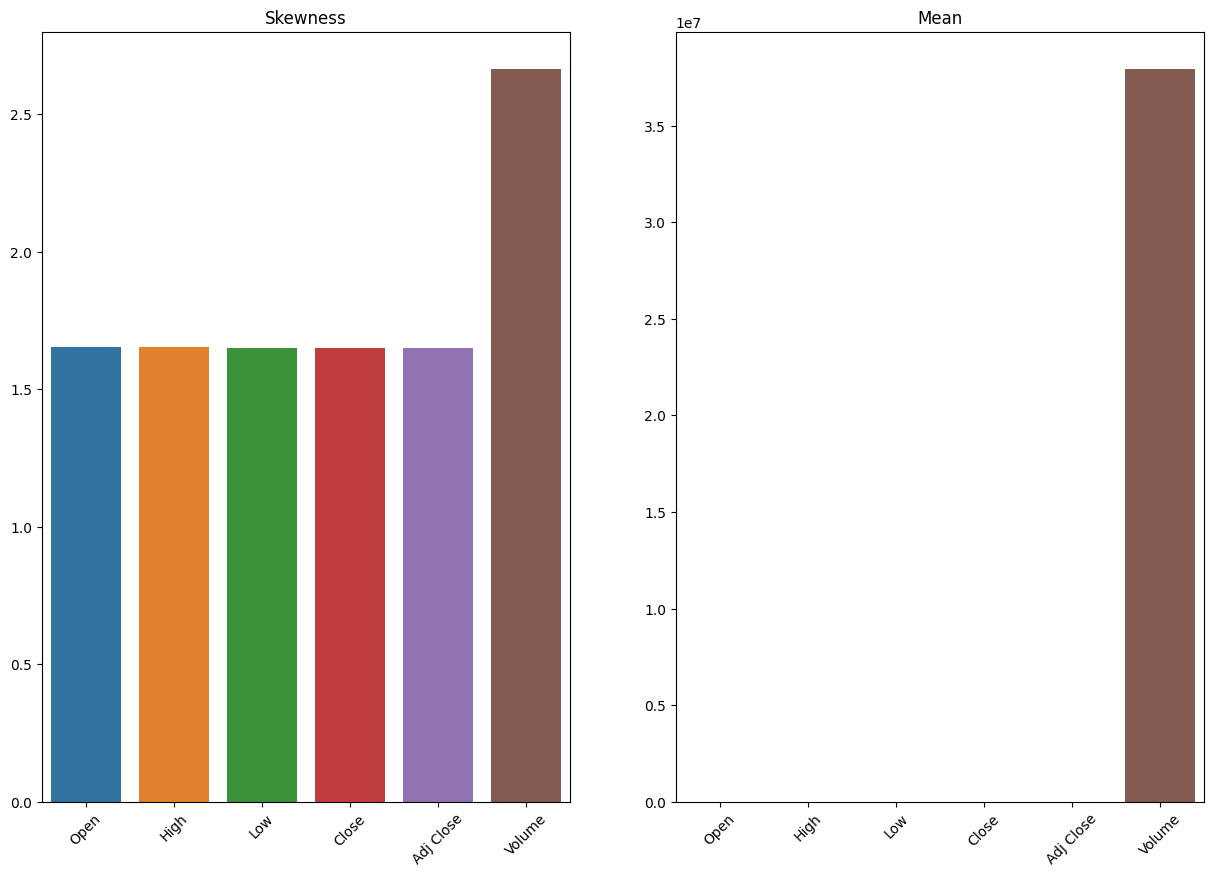

In [12]:
skewness_values = df.skew()
mean_values = df.mean()
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
sns.barplot(x=skewness_values.index, y=skewness_values.values, ax=ax[0])
ax[0].set_title('Skewness')
ax[0].tick_params(axis='x', rotation=45)
sns.barplot(x=mean_values.index, y=mean_values.values, ax=ax[1])
ax[1].set_title('Mean')
ax[1].tick_params(axis='x', rotation=45)
plt.show()


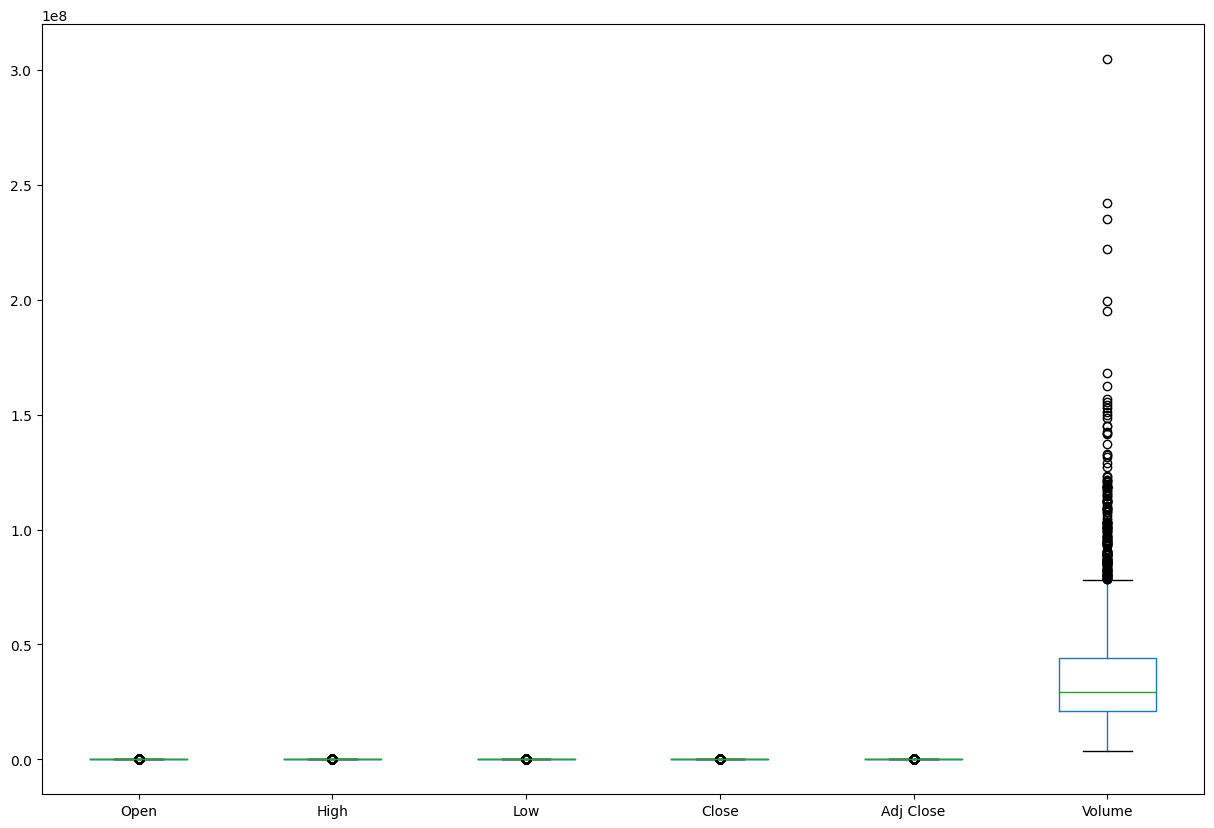

In [13]:
df.boxplot(figsize =(15,10), grid = False)
plt.show()

KeyError: ignored

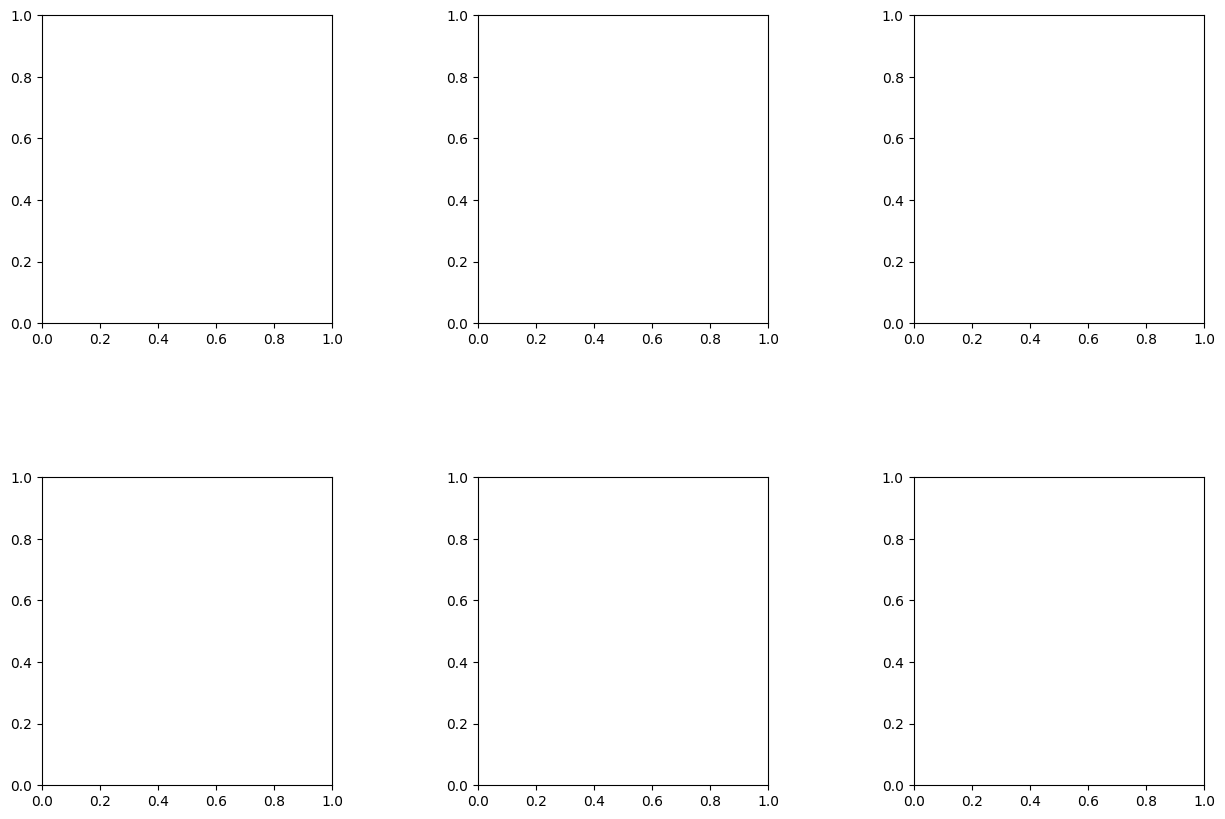

In [17]:
columnas_por_fila = 3
num_columnas = len(df.describe().columns)
num_filas = -(-num_columnas // columnas_por_fila)
fig, ax = plt.subplots(num_filas, columnas_por_fila, figsize=(15, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, columna in enumerate(df.describe().columns):
    fila_actual = i // columnas_por_fila
    columna_actual = i % columnas_por_fila

    sns.boxplot(df[columna], ax=ax[fila_actual, columna_actual])
    ax[fila_actual, columna_actual].set_title(columna)
plt.show()


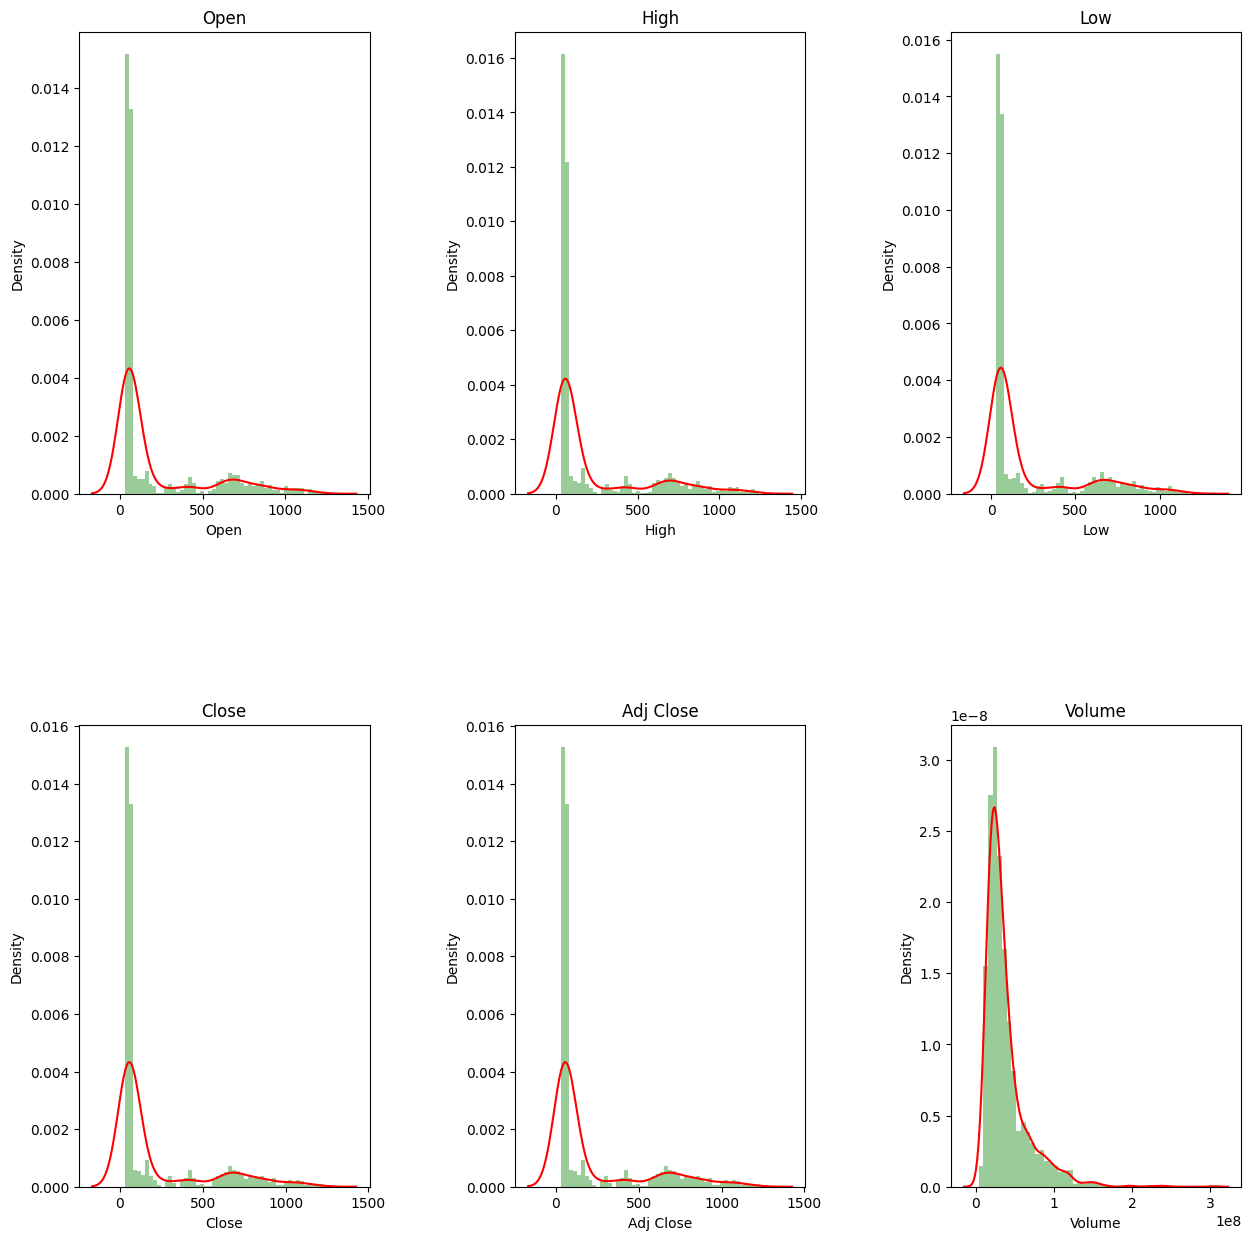

In [18]:
columnas_por_fila = 3
num_columnas = len(df.describe().columns)
num_filas = -(-num_columnas // columnas_por_fila)
fig, ax = plt.subplots(num_filas, columnas_por_fila, figsize=(15, 15))

plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, columna in enumerate(df.describe().columns):
    fila_actual = i // columnas_por_fila
    columna_actual = i % columnas_por_fila
    sns.distplot(df[columna], ax=ax[fila_actual, columna_actual], color='red',hist_kws={'color': 'green'})
    ax[fila_actual, columna_actual].set_title(columna)

plt.show()


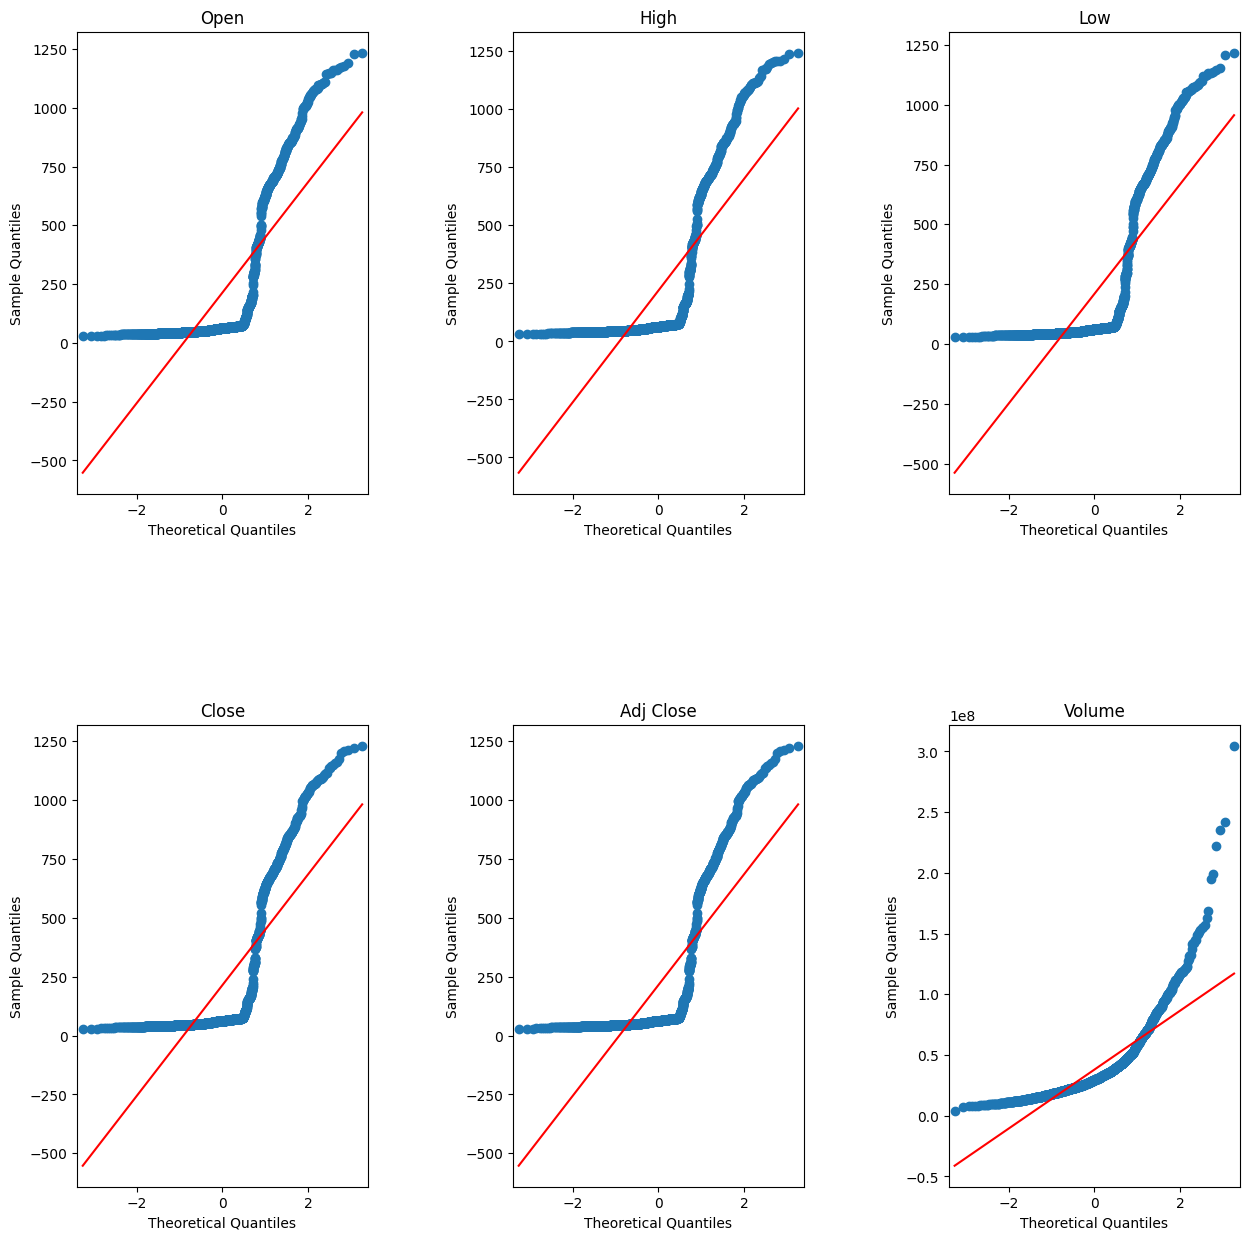

In [19]:
columnas_por_fila = 3
num_columnas = len(df.describe().columns)
num_filas = -(-num_columnas // columnas_por_fila)
fig, ax = plt.subplots(num_filas, columnas_por_fila, figsize=(15, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, columna in enumerate(df.describe().columns):
    fila_actual = i // columnas_por_fila
    columna_actual = i % columnas_por_fila
    smi.qqplot(df[columna], ax=ax[fila_actual, columna_actual],line="r")
    ax[fila_actual, columna_actual].set_title(columna)
plt.show()


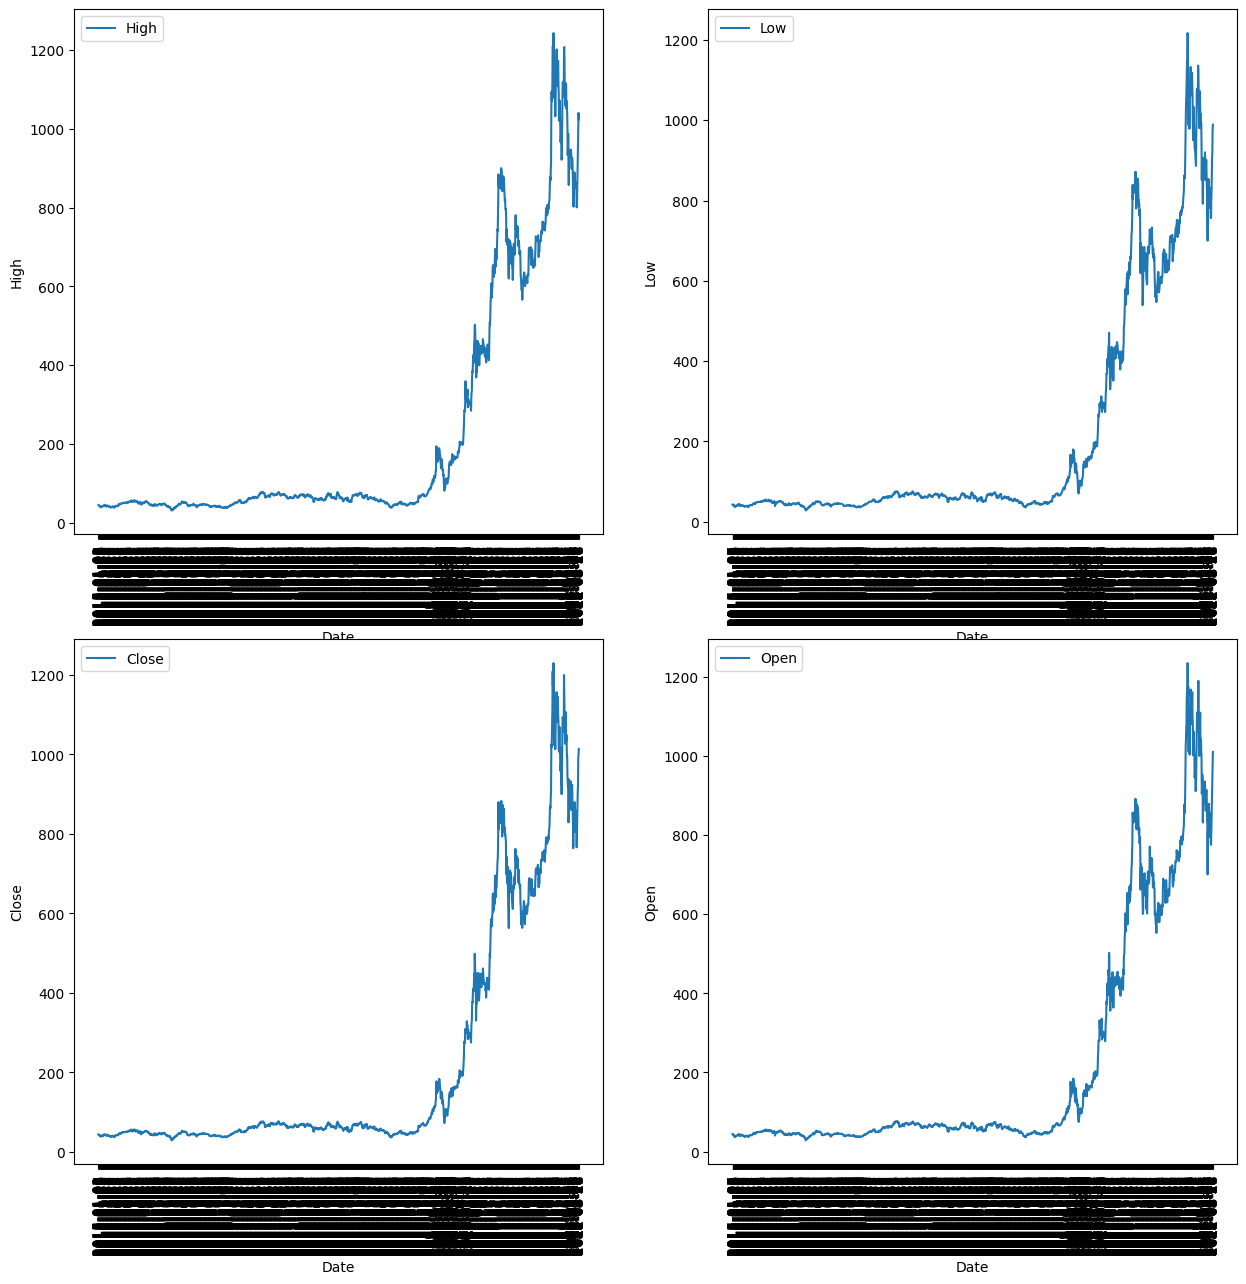

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
sns.lineplot(data=df, x='Date', y='High', label='High', ax=ax[0, 0])
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=90)
sns.lineplot(data=df, x='Date', y='Low', label='Low', ax=ax[0, 1])
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=90)
sns.lineplot(data=df, x='Date', y='Close', label='Close', ax=ax[1, 0])
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=90)
sns.lineplot(data=df, x='Date', y='Open', label='Open', ax=ax[1, 1])
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=90)
plt.show()

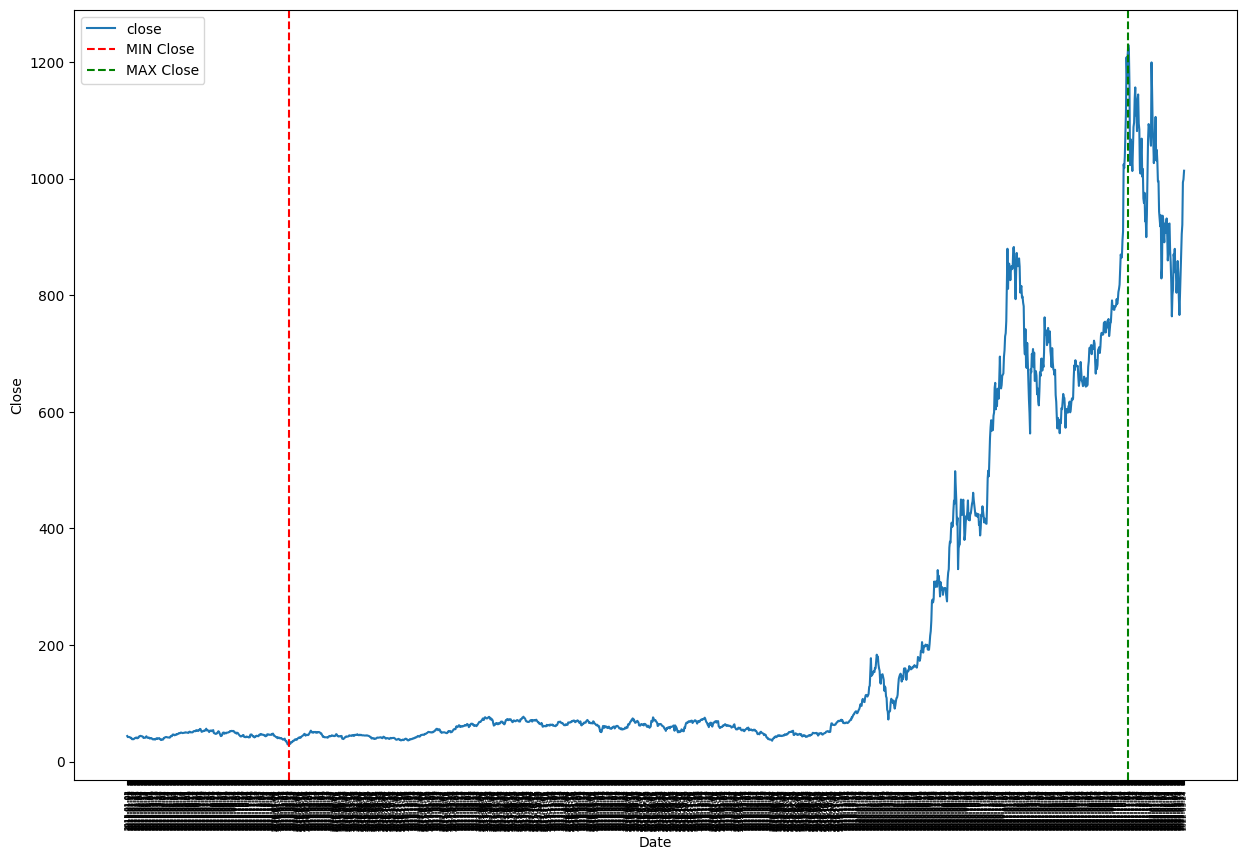

In [21]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x='Date', y='Close', label='close')
min_index = df['Close'].idxmin()
max_index = df['Close'].idxmax()
min_date = df.loc[min_index, 'Date']
max_date = df.loc[max_index, 'Date']
plt.axvline(x=min_date, color='r', linestyle='--', label='MIN Close')
plt.axvline(x=max_date, color='g', linestyle='--', label='MAX Close')
plt.xticks(rotation=90, fontsize = 5)
plt.legend()
plt.show()


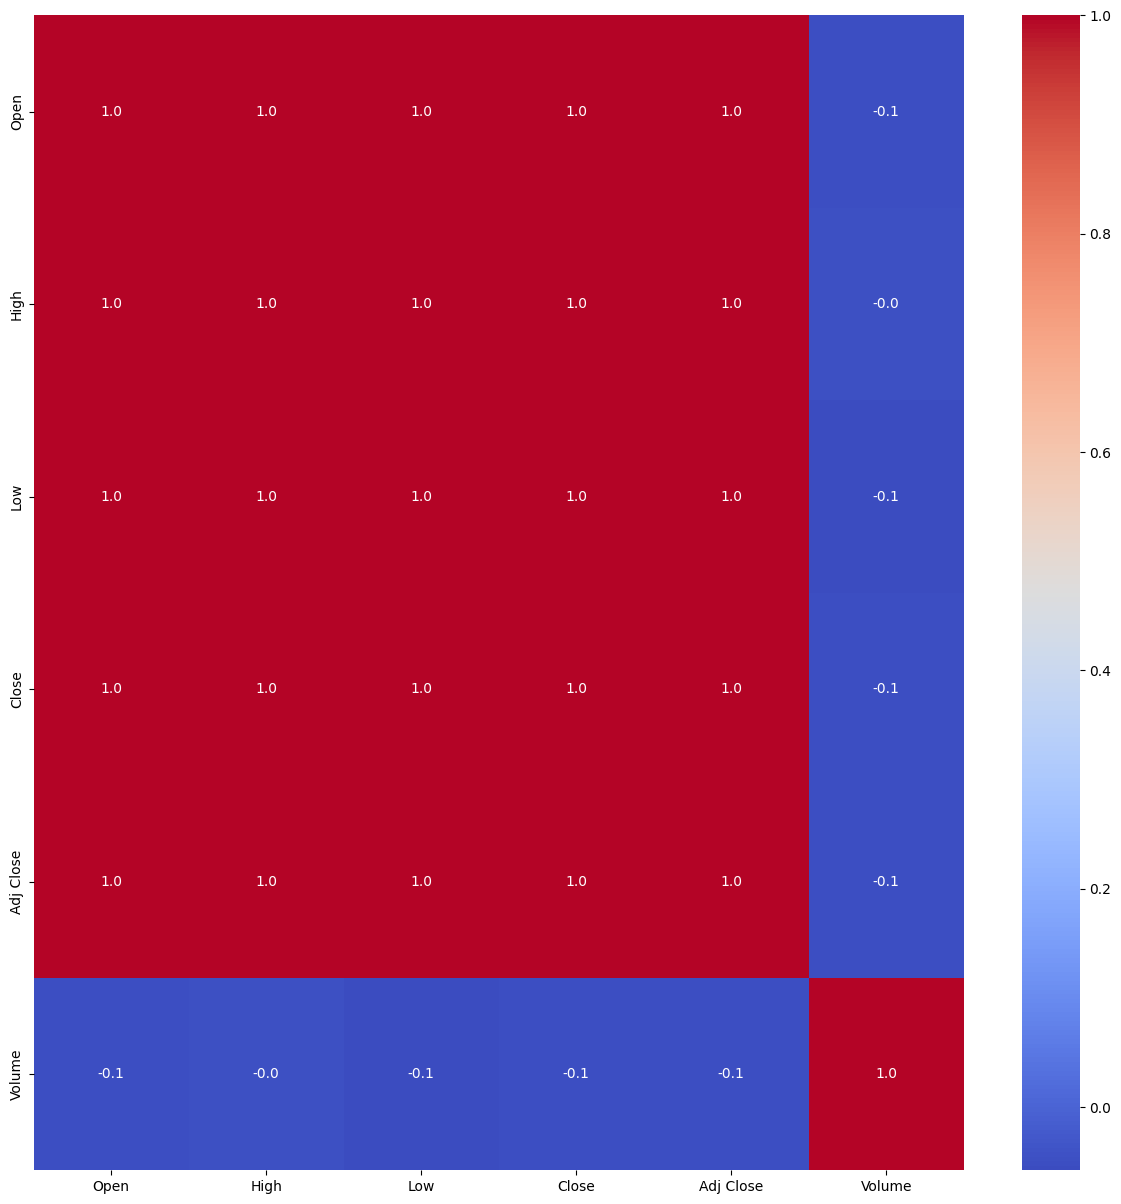

In [22]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, fmt = '.1f', cmap='coolwarm')
plt.show()

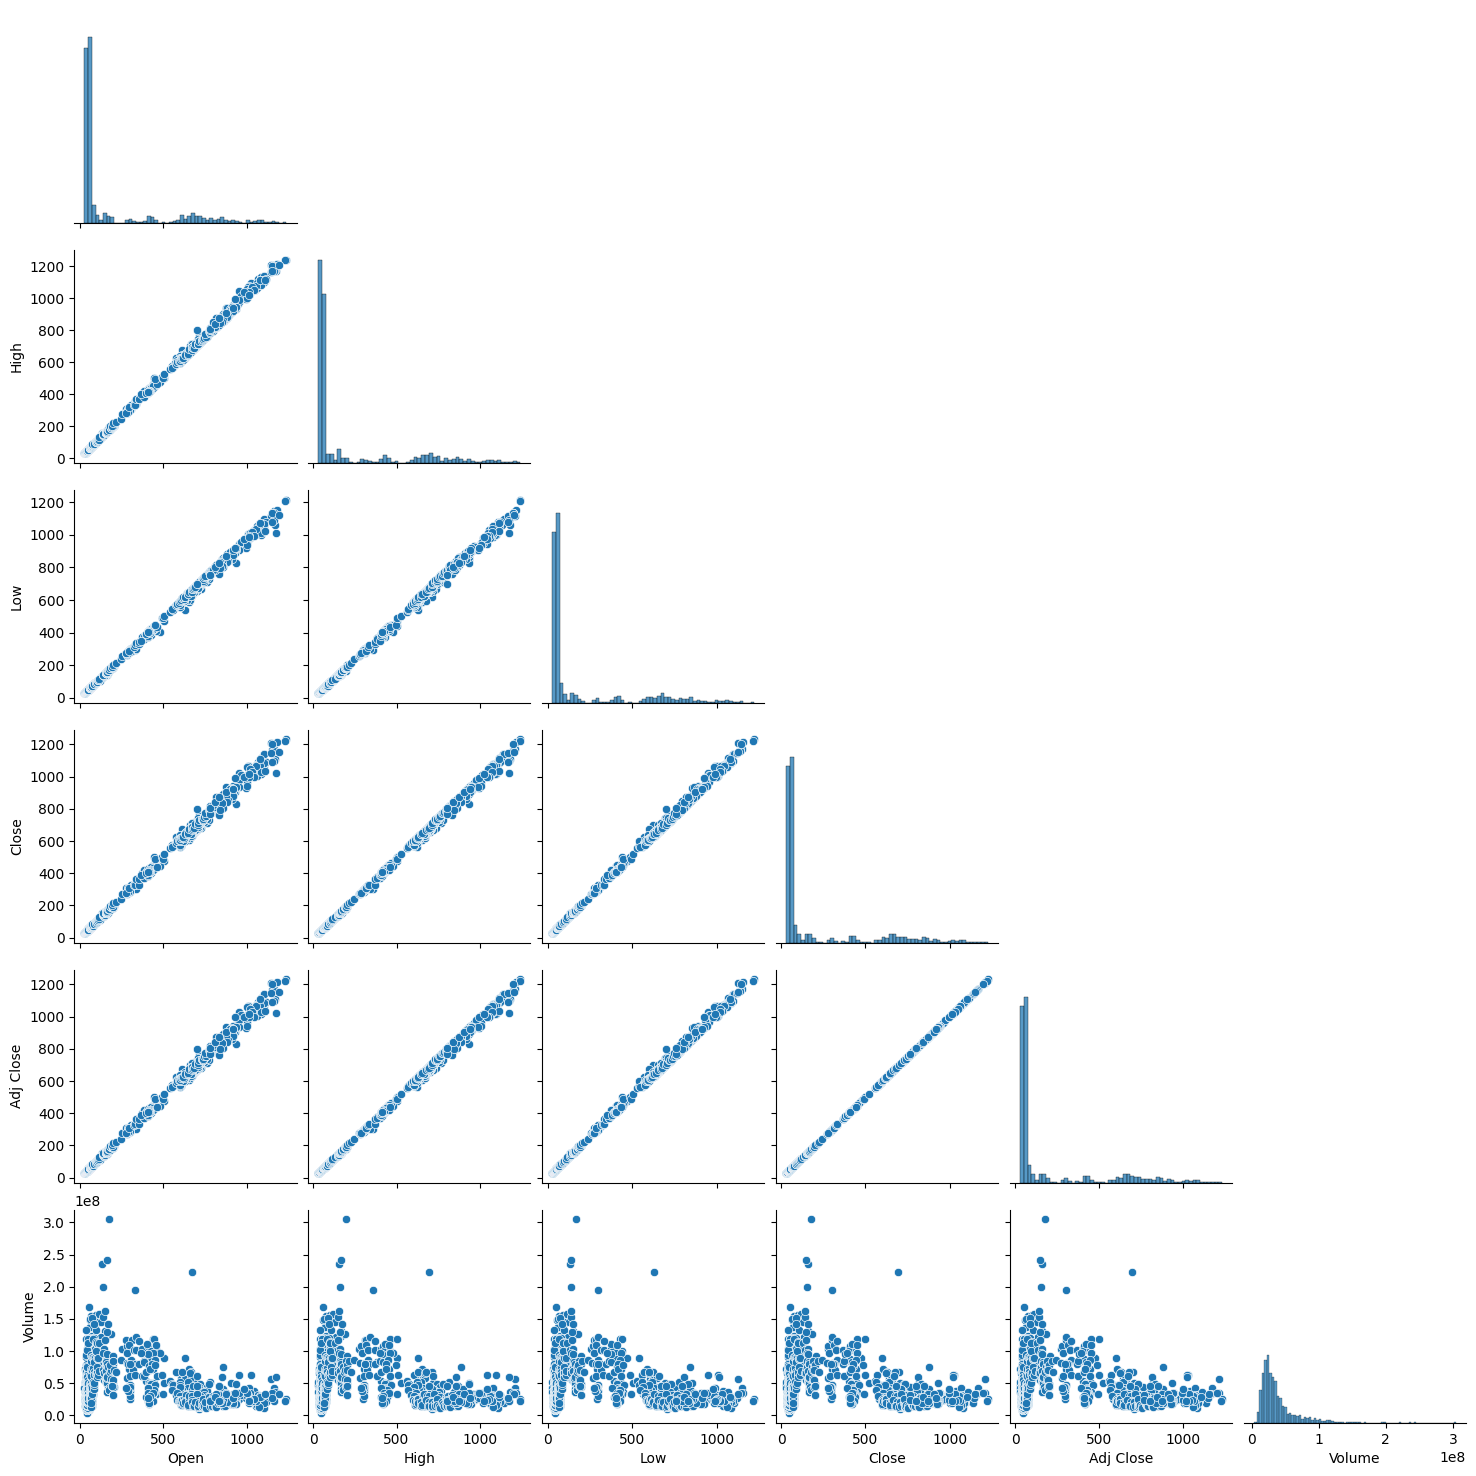

In [23]:
sns.pairplot(df,corner=True)
plt.show()


In [24]:
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [25]:
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length, 0]
        label = data[i + seq_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


In [26]:
seq_length = 10
n_samples = len(data_scaled)
sequences, labels = create_sequences(data_scaled, seq_length)
split = int(0.8 * len(sequences))
X_train, y_train = sequences[:split], labels[:split]
X_test, y_test = sequences[split:], labels[split:]


In [27]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(seq_length, 1),return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


In [29]:
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test,y_test))
predictions_lstm = model.predict(X_test)

Epoch 1/30
46/46 [==============================] - 5s 25ms/step - loss: 0.0017 - val_loss: 0.0121
Epoch 2/30
46/46 [==============================] - 1s 15ms/step - loss: 1.0326e-04 - val_loss: 0.0035
Epoch 3/30
46/46 [==============================] - 1s 15ms/step - loss: 9.8790e-05 - val_loss: 0.0034
Epoch 4/30
46/46 [==============================] - 1s 15ms/step - loss: 9.4518e-05 - val_loss: 0.0032
Epoch 5/30
46/46 [==============================] - 1s 15ms/step - loss: 9.6516e-05 - val_loss: 0.0031
Epoch 6/30
46/46 [==============================] - 1s 16ms/step - loss: 8.9147e-05 - val_loss: 0.0044
Epoch 7/30
46/46 [==============================] - 1s 16ms/step - loss: 9.7269e-05 - val_loss: 0.0081
Epoch 8/30
46/46 [==============================] - 1s 16ms/step - loss: 8.8703e-05 - val_loss: 0.0033
Epoch 9/30
46/46 [==============================] - 1s 16ms/step - loss: 8.7127e-05 - val_loss: 0.0030
Epoch 10/30
46/46 [==============================] - 1s 15ms/step - loss: 1.1

In [30]:
predictions__LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))


In [31]:
dates_test = df['Date'].iloc[split + seq_length:]
df_plot_lstm = pd.DataFrame({'DATE': dates_test, 'Real': y_test_actual_LSTM.flatten(), 'Predict': predictions__LSTM.flatten()})
df_plot_lstm.head(1)


,DATE,Real,Predict
2594,2020-10-16,439.670013,448.460175


In [32]:
model_RNN = Sequential()
model_RNN.add(SimpleRNN(100, activation='relu', input_shape=(seq_length, 1),return_sequences=True))
model_RNN.add(SimpleRNN(50, activation='relu'))
model_RNN.add(Dense(1))
model_RNN.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


In [33]:
model_RNN.fit(X_train, y_train, epochs=30, batch_size=32,validation_data=(X_test, y_test))
predictions_scaled_RNN = model_RNN.predict(X_test)


Epoch 1/30
46/46 [==============================] - 3s 15ms/step - loss: 3.0832e-04 - val_loss: 0.0017
Epoch 2/30
46/46 [==============================] - 0s 8ms/step - loss: 6.8448e-05 - val_loss: 0.0012
Epoch 3/30
46/46 [==============================] - 0s 8ms/step - loss: 4.6002e-05 - val_loss: 0.0011
Epoch 4/30
46/46 [==============================] - 0s 9ms/step - loss: 3.6948e-05 - val_loss: 9.1139e-04
Epoch 5/30
46/46 [==============================] - 0s 8ms/step - loss: 3.8525e-05 - val_loss: 0.0010
Epoch 6/30
46/46 [==============================] - 0s 8ms/step - loss: 3.6910e-05 - val_loss: 0.0010
Epoch 7/30
46/46 [==============================] - 0s 8ms/step - loss: 3.4053e-05 - val_loss: 0.0013
Epoch 8/30
46/46 [==============================] - 0s 9ms/step - loss: 3.1563e-05 - val_loss: 8.2667e-04
Epoch 9/30
46/46 [==============================] - 0s 9ms/step - loss: 2.7796e-05 - val_loss: 8.4285e-04
Epoch 10/30
46/46 [==============================] - 0s 9ms/step - lo

In [34]:
predictions_RNN = scaler.inverse_transform(predictions_scaled_RNN)
y_test_RNN = scaler.inverse_transform(y_test.reshape(-1, 1))


In [35]:
df_plot_RNN = pd.DataFrame({'DATE': dates_test, 'Real': y_test_RNN.flatten(),'Predict': predictions_RNN.flatten()})
df_plot_RNN.head(1)


,DATE,Real,Predict
2594,2020-10-16,439.670013,449.488068


In [36]:
model_gru = Sequential()
model_gru.add(GRU(100, activation='relu', input_shape=(seq_length, 1),return_sequences=True))
model_gru.add(GRU(50, activation='relu'))
model_gru.add(Dense(1))
model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


In [37]:
model_gru.fit(X_train, y_train, epochs=30, batch_size=32,validation_data=(X_test, y_test))
predictions_scaled_gru = model_gru.predict(X_test)

Epoch 1/30
46/46 [==============================] - 6s 38ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 2/30
46/46 [==============================] - 1s 17ms/step - loss: 8.6597e-05 - val_loss: 0.0025
Epoch 3/30
46/46 [==============================] - 1s 15ms/step - loss: 5.4261e-05 - val_loss: 0.0028
Epoch 4/30
46/46 [==============================] - 1s 15ms/step - loss: 5.9366e-05 - val_loss: 0.0016
Epoch 5/30
46/46 [==============================] - 1s 14ms/step - loss: 8.0184e-05 - val_loss: 0.0059
Epoch 6/30
46/46 [==============================] - 1s 15ms/step - loss: 5.8262e-05 - val_loss: 0.0036
Epoch 7/30
46/46 [==============================] - 1s 15ms/step - loss: 5.2410e-05 - val_loss: 0.0042
Epoch 8/30
46/46 [==============================] - 1s 15ms/step - loss: 5.8164e-05 - val_loss: 0.0021
Epoch 9/30
46/46 [==============================] - 1s 15ms/step - loss: 5.3477e-05 - val_loss: 0.0048
Epoch 10/30
46/46 [==============================] - 1s 15ms/step - loss: 5.0

In [38]:
predictions_GRU = scaler.inverse_transform(predictions_scaled_gru)
y_test_GRU = scaler.inverse_transform(y_test.reshape(-1, 1))

In [39]:
df_plot_GRU = pd.DataFrame({'DATE': dates_test, 'Real': y_test_GRU.flatten(),'Predict': predictions_GRU.flatten()})
df_plot_GRU.head(1)

,DATE,Real,Predict
2594,2020-10-16,439.670013,463.986938


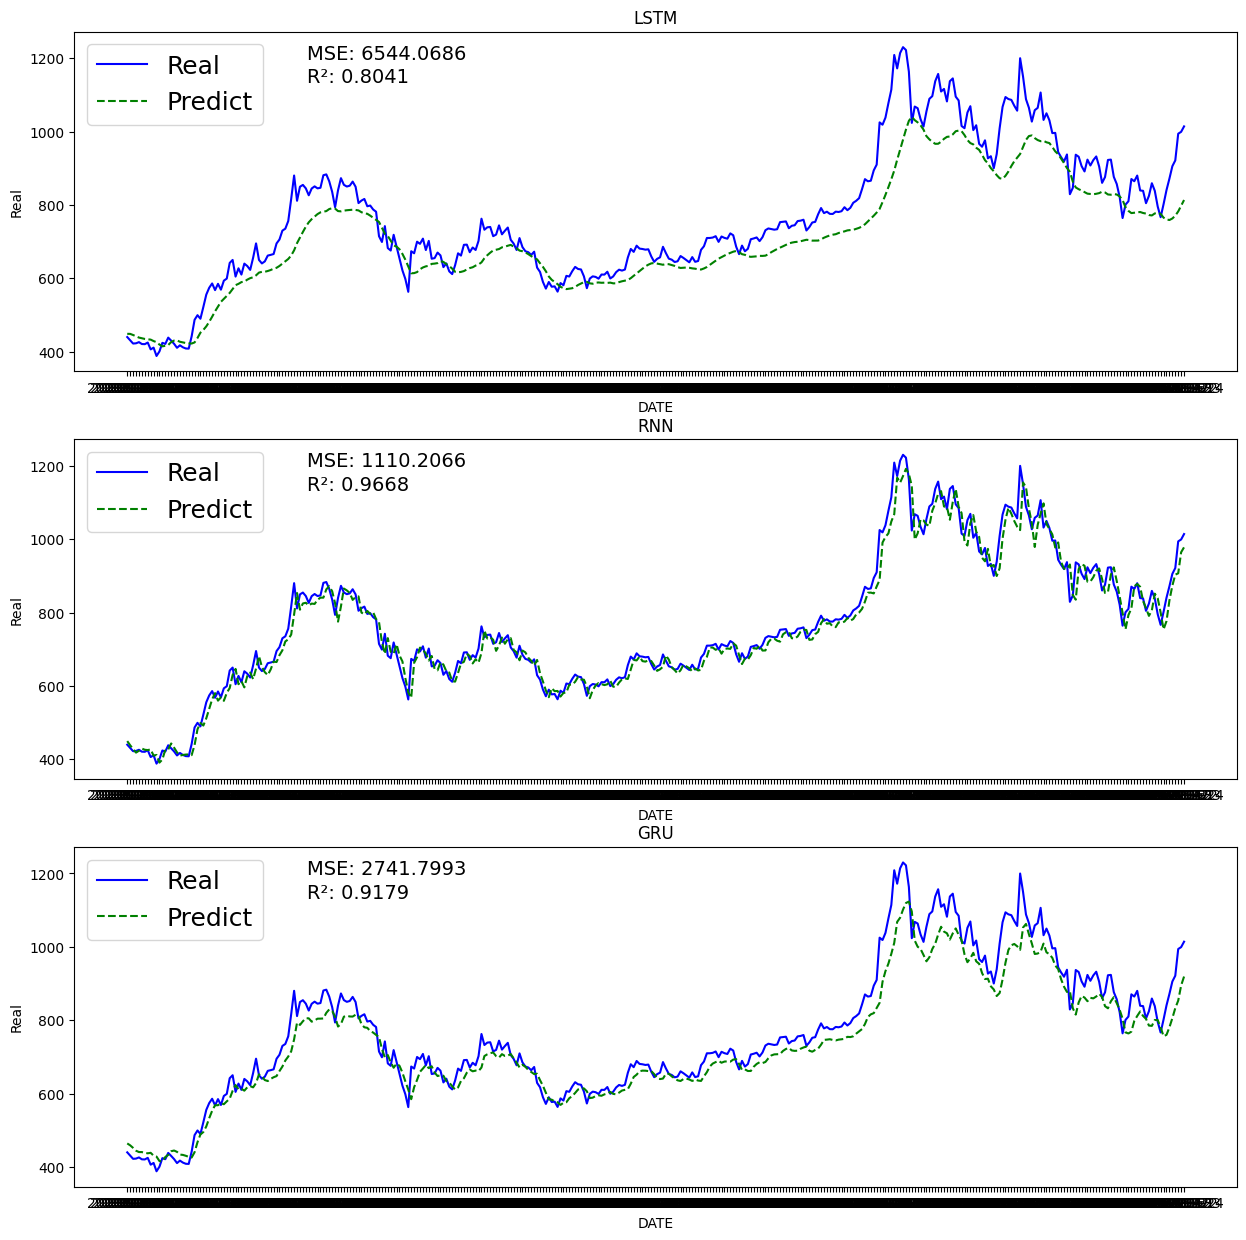

In [41]:
mse_lstm = mean_squared_error(df_plot_lstm['Real'], df_plot_lstm['Predict'])
mse_rnn = mean_squared_error(df_plot_RNN['Real'], df_plot_RNN['Predict'])
mse_GRU = mean_squared_error(df_plot_GRU['Real'], df_plot_GRU['Predict'])
r2_lstm = r2_score(df_plot_lstm['Real'], df_plot_lstm['Predict'])
r2_rnn = r2_score(df_plot_RNN['Real'], df_plot_RNN['Predict'])
r2_GRU = r2_score(df_plot_GRU['Real'], df_plot_GRU['Predict'])
fig, ax = plt.subplots(3, 1, figsize=(15, 15))
sns.lineplot(x='DATE', y='Real', data=df_plot_lstm, label='Real', color='blue',ax = ax[0])
sns.lineplot(x='DATE', y='Predict', data=df_plot_lstm, label='Predict',color='green', linestyle='dashed', ax = ax[0])
sns.lineplot(x='DATE', y='Real', data=df_plot_RNN, label='Real', color='blue',ax = ax[1])
sns.lineplot(x='DATE', y='Predict', data=df_plot_RNN, label='Predict',color='green', linestyle='dashed', ax = ax[1])
sns.lineplot(x='DATE', y='Real', data=df_plot_GRU, label='Real', color='blue',ax = ax[2])

sns.lineplot(x='DATE', y='Predict', data=df_plot_GRU, label='Predict',color='green', linestyle='dashed', ax = ax[2])
ax[0].text(0.2, 0.85, f'R²: {r2_lstm:.4f}', fontsize=14, color='black',transform=ax[0].transAxes)
ax[0].text(0.2, 0.92, f'MSE: {mse_lstm:.4f}', fontsize=14, color='black',transform=ax[0].transAxes)
ax[1].text(0.2, 0.85, f'R²: {r2_rnn:.4f}', fontsize=14, color='black',transform=ax[1].transAxes)
ax[1].text(0.2, 0.92, f'MSE: {mse_rnn:.4f}', fontsize=14, color='black',transform=ax[1].transAxes)
ax[2].text(0.2, 0.85, f'R²: {r2_GRU:.4f}', fontsize=14, color='black',transform=ax[2].transAxes)
ax[2].text(0.2, 0.92, f'MSE: {mse_GRU:.4f}', fontsize=14, color='black',transform=ax[2].transAxes)
ax[0].set_title('LSTM')
ax[1].set_title('RNN')
ax[2].set_title('GRU')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[2].legend(fontsize=18)
plt.show()
